In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Generate some normally distributed data
true_mu = 1
true_sg = 3
N = 1000 
x = np.random.normal(true_mu, true_sg, size=N)

In [4]:
## define a fit model
from scipy.stats import norm
def model(x, mu, sg):
    return norm.pdf(x, mu, sg) 

In [5]:
## define the function we want to minimize
## can use iminuits built in cost for this
## which will define the negative log likelihood
from iminuit.cost import UnbinnedNLL
nll = UnbinnedNLL(x, model)

In [6]:
## now construct the iminuit minimizer
## which **requires** starting values
from iminuit import Minuit
mi = Minuit(nll, mu=0, sg=2)

In [7]:
## run minimisation routine called `migrad`
mi.migrad()

# FCN is the value of the cost function at the current minimum - want small FCN
# Nfcn is the total number of function evaluations - low value indicates effient optimisation
# EDM is estimate distance to the minimum
# The second table the optimised values for mu and sigma and 1 sigma uncertainty computed from the Hesse matrix
# The third table is the covariance matrix 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4984                       │              Nfcn = 54               │
│ EDM = 7.64e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   1.13    │   0.09    │            │            │         │         │       │
│ 1 │ sg   │   2.92    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mu      sg │
├────┼─────────────────┤
│ mu │ 0.00855   0.000 │
│ sg │   0.000 0.00428 │
└────┴─────────────────┘

In [8]:
## run the `hesse` algorithm which does a more accurate computation of the second derivatives
## for the covariance matrix
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4984                       │              Nfcn = 66               │
│ EDM = 7.64e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   1.13    │   0.09    │            │            │         │         │       │
│ 1 │ sg   │   2.92    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mu      sg │
├────┼─────────────────┤
│ mu │ 0.00855   0.000 │
│ sg │   0.000 0.00428 │
└────┴─────────────────┘

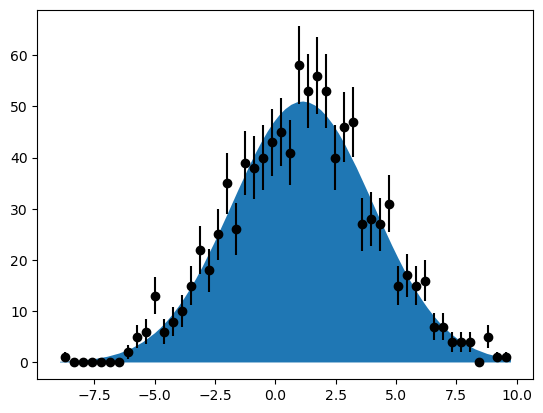

In [9]:
## visualise the fit result using `iminuits` built in method
mi.visualize()

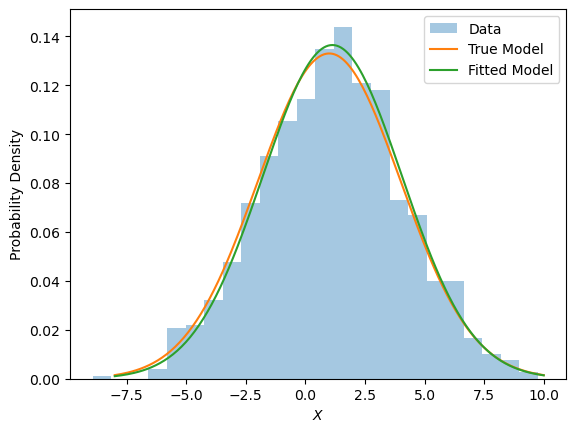

In [10]:
plt.hist(x, bins='auto', density=True, alpha=0.4, label='Data')
xp = np.linspace(-8,10,200)
plt.plot(xp, model(xp, true_mu, true_sg), label='True Model')
plt.plot(xp, model(xp, *mi.values), label='Fitted Model')
plt.xlabel('$X$') 
plt.ylabel('Probability Density')
plt.legend()

In [11]:
## define our own nll function so we can draw it
def nlnL(mu, sg):
    return -np.sum( norm.logpdf(x, mu, sg) )

vec_nlnL = np.vectorize( nlnL ) 

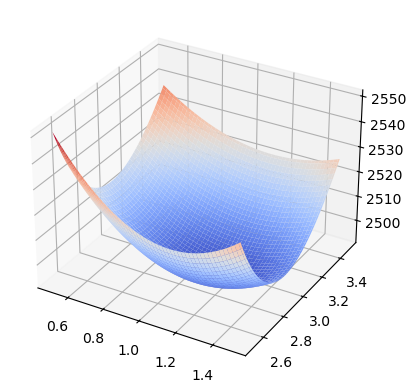

In [12]:
# plot as surface
fig, ax = plt.subplots( subplot_kw={'projection':'3d'} )
mu = np.linspace(0.5,1.5,100)
sg = np.linspace(2.5,3.5,100)
mug, sgg = np.meshgrid(mu,sg)
ax.plot_surface(mug, sgg, vec_nlnL(mug,sgg), cmap='coolwarm' )

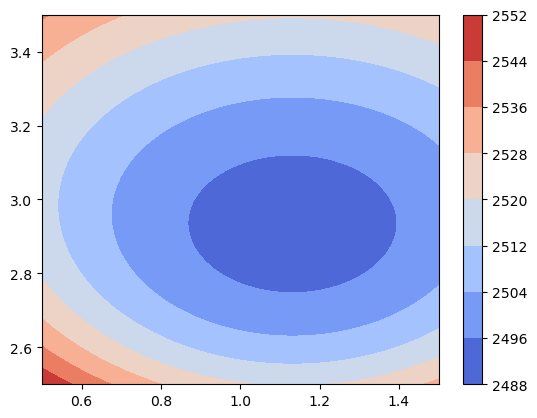

In [13]:
# plot as contour
im = plt.contourf( mug, sgg, vec_nlnL(mug,sgg), cmap='coolwarm')
plt.colorbar(im)

In [14]:
## scan the 1D likelihood in mu by hand
nlls = []
for mval in mu:
    # set the minuit value of mu to the scan value
    mi.values['mu'] = mval
    # now fix this parameter in the minimisation (so it will not be "floated")
    mi.fixed['mu'] = True
    # run the minimisation again
    mi.migrad()
    # save the resulting nll value
    nlls.append( mi.fval )

print(mi)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5000                       │              Nfcn = 671              │
│ EDM = 2.39e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

Text(0, 0.5, '$-2NLL$')

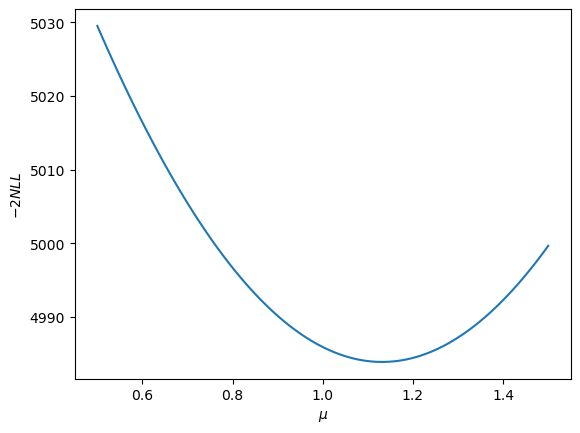

In [15]:
plt.plot(mu, nlls)
plt.xlabel('$\mu$')
plt.ylabel('$-2NLL$') 

## iminuit example of profiling the likelihood

In [16]:
# release previously fixed parameter
mi.fixed['mu']=False

In [17]:
# re-run the minimisation
mi.migrad()

# run the minos error routine
mi.minos()

# Asymmetric uncertainties computed using the MINOS algorithm
# Minos error- (negative (downward) uncertainty), Minos error+ (positive (upward) uncertainty)
# Third table gives minos errors for the parameters, whether the minos computation was successful, 
# Whether parameter was at a bound, 
# Whether the maximum allowed value of the FCN was exceeded during the Minos calculation
# And whether Minos found a new minimum during the error computation.

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4984                       │              Nfcn = 739              │
│ EDM = 1.43e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   1.13    │   0.09    │   -0.09    │    0.09    │         │         │       │
│ 1 │ sg   │   2.92    │   0.07    │   -0.06    │    0.07    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │          sg           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.09   │   0.09    │   -0.06   │   0.07    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      mu      sg │
├────┼─────────────────┤
│ mu │ 0.00855   0.000 │
│ sg │   0.000 0.00428 │
└────┴─────────────────┘

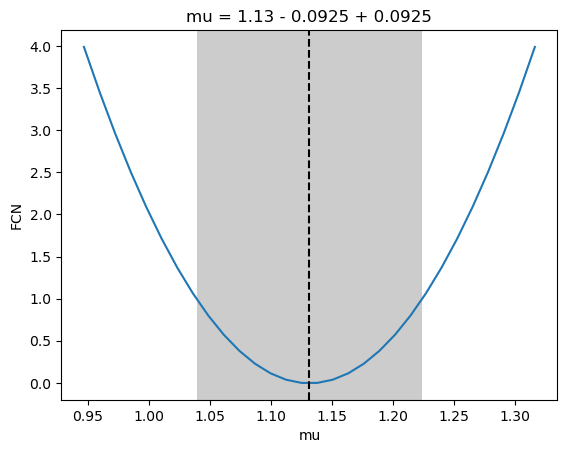

In [18]:
_ = mi.draw_mnprofile('mu')

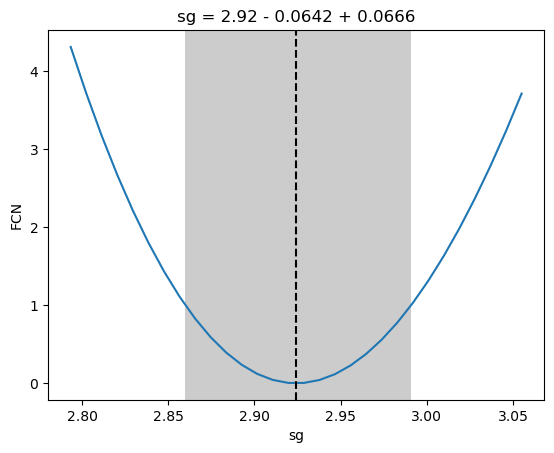

In [19]:
_ = mi.draw_mnprofile('sg')

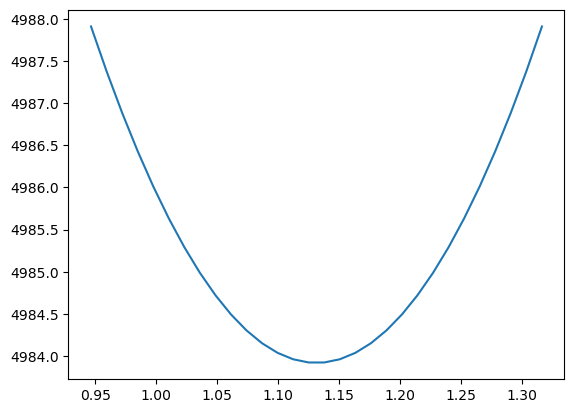

In [20]:
mu, n2ll, valid = mi.mnprofile('mu')
plt.plot(mu[valid], n2ll[valid]) 

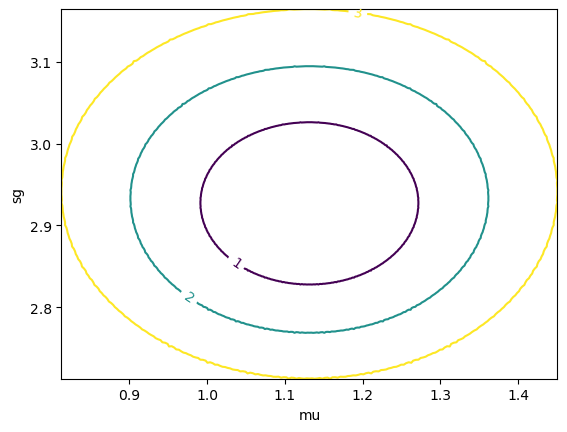

In [21]:
# use iminuits built in contour drawer
mi.draw_mncontour('mu','sg', cl=[1,2,3], size=500) 

In [22]:
# or if we rather plot it ourselves
# note this produces x,y coords of the actual contours
# not a 2D scan
contours = np.array( [ mi.mncontour('mu','sg', cl=cl, size=1000, interpolated=True) for cl in [1,2,3] ] )
print(contours.shape)

# (3 contours, 1001 points, 2 parameters)

(3, 1001, 2)


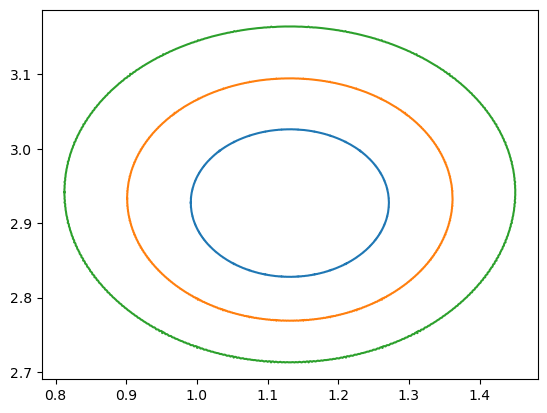

In [23]:
for c in [0,1,2]:
    plt.plot(*contours[c].T)

(2.662648272194095, 3.1857435149205773)

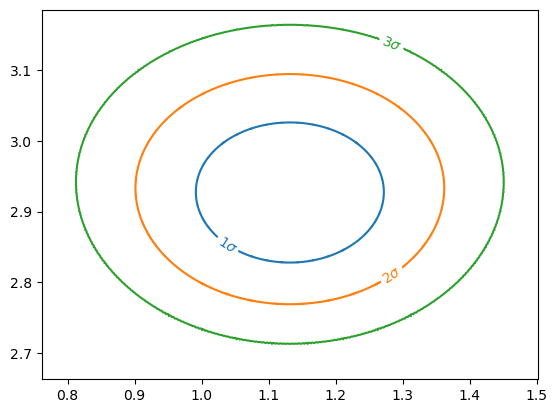

In [24]:
# plot with pretty labels using mpl ContourSet
from matplotlib.contour import ContourSet
fig, ax = plt.subplots()
contours = [ [ mi.mncontour('mu','sg', cl=cl, size=1000, interpolated=True) ] for cl in [1,2,3] ] 
cs = ContourSet(ax, [1,2,3], contours, colors=['C0','C1','C2'])
ax.clabel(cs, fmt=lambda x: f'${x}\sigma$') 

xlim = (mi.values['mu'] - 4*mi.errors['mu'], mi.values['mu'] + 4*mi.errors['mu'])
ylim = (mi.values['sg'] - 4*mi.errors['sg'], mi.values['sg'] + 4*mi.errors['sg']) 

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

In [25]:
mi.migrad()
mu_bf = mi.values['mu']
sg_bf = mi.values['sg']
nll_bf = mi.fmin

mu = np.linspace(*xlim,50)
sg = np.linspace(*ylim,50)

mu, sg = np.meshgrid(mu,sg)


nll = []

for mupt, sgpt in zip( mu.flatten(), sg.flatten() ):
    mi.values['mu'] = mupt
    mi.values['sg'] = sgpt
    mi.fixed['mu'] = True
    mi.fixed['sg'] = True
    mi.migrad()
    nll.append( mi.fval )
    
nll = np.array(nll).reshape(mu.shape)

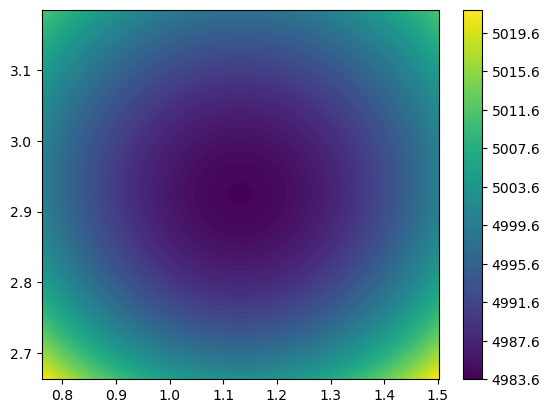

In [26]:
im = plt.contourf( mu, sg, nll, levels=100 )
plt.colorbar(im) 

## An EML example using `iminuit`

- `iminuit` also has a built in cost function for EML fits: `iminuit.cost.ExtendedUnbinnedNLL`

In [27]:
import numpy as np

# generate some Gaussian distributed data 
# with a poisson random number of events 

N = np.random.poisson(1000)
dset = np.random.normal(0, 1, size=N)

# construct a model to fit
from scipy.stats import norm 

def model(x, mu, sg):
    return norm.pdf(x, mu, sg) 

# iminuit wants the density to return the number N as well as the number times the shape
# so it can compute both the normal ML term and the extended term
def density(x, N, mu, sg):
    return N, N*norm.pdf(x,mu,sg)

from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL

# make the cost function, in this case the 
# negative log likelihood
nll = ExtendedUnbinnedNLL(dset, density)

# construct the minimisation object which # needs to be passed starting values
mi = Minuit(nll, N=1000, mu=0, sg=1)

# minimise it
mi.migrad()

# run the "Hesse" algorithm to compute the
# covariance matrix (from inverse second derivs) 
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -8942                      │              Nfcn = 64               │
│ EDM = 1.61e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │    993    │    32     │            │            │         │         │       │
│ 1 │ mu   │   0.041   │   0.031   │            │            │         │         │       │
│ 2 │ sg   │   0.979   │   0.022   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────┐
│    │        N       mu       sg │
├────┼────────────────────────────┤
│  N │      993        0        0 │
│ mu │        0 0.000966        0 │
│ sg │        0        0 0.000483 │
└────┴────────────────────────────┘

993


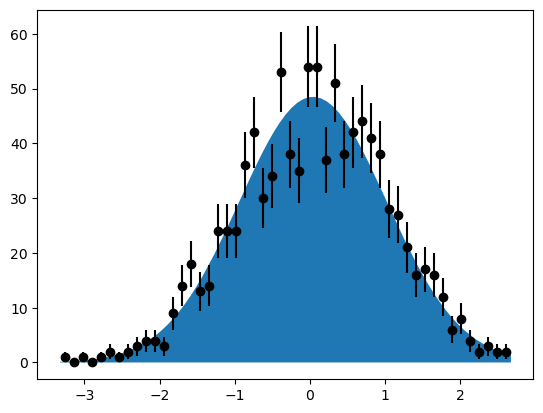

In [28]:
mi.visualize()

print(len(dset))

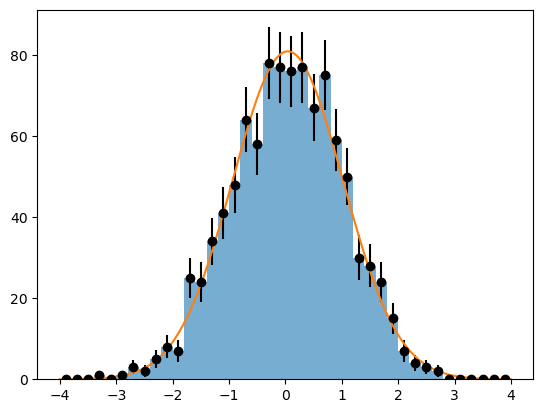

In [29]:
# plot the fit result
nh, xe, _ = plt.hist(dset, bins=40, range=(-4,4), alpha=0.6, label='Dataset')
cx = 0.5*(xe[1:]+xe[:-1])
plt.errorbar( cx, nh, nh**0.5, fmt='ko' )

# need to track the bin width to get the normalisation right
bw = xe[1]-xe[0]
x = np.linspace(-4,4,200)
plt.plot( x, density(x, *mi.values)[1]*bw, label='Fitted Model')